<a href="https://colab.research.google.com/github/Techlon/demo/blob/main/fashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
# Load the Data and Flatten it
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print ("x_train.shape:", x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
#Since Convolution requires a 3D array, we are going to add a superflous dimension to the 2D array.
#Thus we have to call the expand_dims function to expand the array into a 3D
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print (x_train.shape)

(60000, 28, 28, 1)


In [5]:
#To Determine The Number of Classes, we would have to cast y to a set because a set gives only unique values
k = len(set(y_train))
print ("Number of Classes", k)

Number of Classes 10


In [6]:
#Using Functional API to build the Model
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu') (i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu') (i)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu') (i)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = 'softmax') (x)

model = Model(i, x)


In [7]:
#Compile and fit
model.compile (optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ('accuracy'))
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 30s 10ms/step - loss: 0.3904 - accuracy: 0.8592 - val_loss: 0.3218 - val_accuracy: 0.8789
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2670 - accuracy: 0.8996 - val_loss: 0.2911 - val_accuracy: 0.8916
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2127 - accuracy: 0.9204 - val_loss: 0.2762 - val_accuracy: 0.8999
Epoch 4/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1721 - accuracy: 0.9353 - val_loss: 0.2755 - val_accuracy: 0.9060
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1407 - accuracy: 0.9476 - val_loss: 0.2893 - val_accuracy: 0.9073
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1174 - accuracy: 0.9558 - val_loss: 0.3062 - val_accuracy: 0.9081
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0957 - accuracy: 0.9642 - val_loss: 0.3443 -

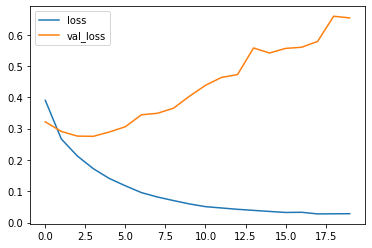

In [8]:
#Plot for Loss per Iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

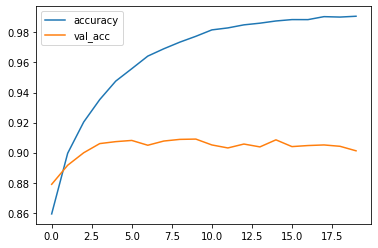

In [9]:
#Plot for Accuracy Per Iteration
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

Confusion, Matrix without Normalization
[[834   0  22  15   4   3 117   0   5   0]
 [  1 982   0  11   2   0   1   0   3   0]
 [ 16   1 874   6  45   0  54   0   2   2]
 [ 13   4  14 892  35   0  40   0   2   0]
 [  0   0 107  30 793   0  68   0   2   0]
 [  0   0   0   0   0 974   0  13   0  13]
 [ 92   1  73  18  55   0 751   0   8   2]
 [  0   0   0   0   0   6   0 969   1  24]
 [  2   3   2   4   1   1   7   2 977   1]
 [  0   0   0   0   0   5   0  29   0 966]]


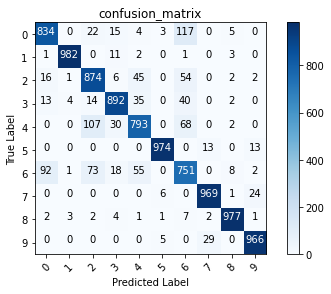

In [10]:
#Plot for Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title = 'confusion_matrix', cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix
  Normalization can be applied by setting normalize = True
  """
  if normalize:
    cm = cm.astype('float')/cm.sum(axis = 1) [:, np.newaxis]
    print ('Normalized Confusion Matrix')
  else:
    print ('Confusion, Matrix without Normalization')
  print (cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range (cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt), horizontalalignment = 'center', color = 'white' if cm [i,j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict (x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [11]:
#label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

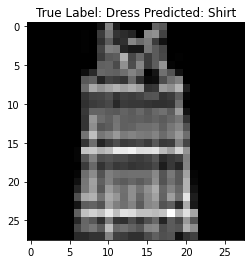

In [12]:
#Some Misclassified Examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title('True Label: %s Predicted: %s' %(labels[y_test[i]], labels[p_test[i]]));